<center><h1>Lab14:<br>Driven Harmonic Motion</h1></center>
</h2>Introduction</h2>
The oscillators we have studided so far have all been non-driven oscillators. That is, they have had no external energy source. Many of the most interesting physical oscillators are driven oscillators, when an external source pumps energy into the oscillator; the external source could be a power supply, an earthquake, or as in this <a href="https://www.youtube.com/watch?v=j-zczJXSxnw">movie</a> (which we watched last week), the wind.
<h2>Driven, Damped Oscillator</h2>
We begin with the damped oscillator of last week, whose equation of motion was:
<br>
$\frac{d^2 x}{dt^2} + \gamma \frac{dx}{dt} + \omega^2 x = 0 \quad (1)$
<br>
We found the general solution to this equation:

In [1]:
import sympy as sym

A, γ, ϕ, ω, t = sym.symbols('A γ ϕ ω t')

def x1(A, γ, ϕ, ω, t):
    return A * sym.E**-((γ*t)/2) * sym.cos(ϕ + (1/2)*(-γ**2 + 4 * ω**2)**(1/2) * t)

x1(A, γ, ϕ, ω, t)

A*exp(-t*γ/2)*cos(0.5*t*(-γ**2 + 4*ω**2)**0.5 + ϕ)

We can trade the arbitrary constants $A$ and $\phi$ for the initial conditions $x_0$ and $v_0$, as we did last week:

In [4]:
#Sometimes this cell fails to run if you use 'run all cells', you may have to run it by hand

x0, v0 = sym.symbols('x0 v0')
A = (x0*sym.sec(ϕ))
ϕ = sym.atan((-2*v0-γ*x0)/((-γ**2 + 4*ω**2)**(1/2) * x0))

So that the complete solution is:

In [5]:
x1(A, γ, ϕ, ω, t)

x0*sqrt(1 + (-2*v0 - x0*γ)**2/(x0**2*(-γ**2 + 4*ω**2)**1.0))*exp(-t*γ/2)*cos(0.5*t*(-γ**2 + 4*ω**2)**0.5 + atan((-2*v0 - x0*γ)/(x0*(-γ**2 + 4*ω**2)**0.5)))

Equation (1) is called a <u>homogeneous</u> differential equation: it depends on the indepedent variable (which is $t$) only implicitly, through the function $x(t)$. Another way of putting this is that there are no explicit '$t$'s in the equation.
<br>
<br>
A damped, driven oscillator is one in which there is an additional external force which varies with time, $F(t)$. Then the equation of motion takes the form:
<br>
$\frac{d^2 x}{dt^2} + \gamma \frac{dx}{dt} + \omega^2 x = F(t)$
<br>
We will start by studying the response of a simple harmonic oscillator to a sinusoidal force. A sinusoidal force is a sine-like force and thus indcludes cosine forces as well. We will take the driving force to be:
<br>
$F(t) = F_m \cos(\omega_e t)$
<br>
So we have:
<br>
$\frac{d^2 x}{dt^2} + \gamma \frac{dx}{dt} + \omega^2 x = F_m \cos(\omega_e t) \quad (2)$
<br>
Here $F_m$ is the amplitude of the driving force and $\omega_e$ is the angular frequency of the applied external driving force. This differential equation is <u>inhomogeneous</u>: it depends explicitly on $t$.
<br>
How will we solve this equation? It is a general theorem in differential equations that the solution to an inhomogeneous equation can be written as the sum of two parts: <u>The general solution to the homogenous part <b>plus</b> any one solution to the inhomogeneous equation.</u> This gives the general solution to the inhomogeneous equation. We have already solved the homogeous equation above.

In [6]:
x1(A, γ, ϕ, ω, t)

x0*sqrt(1 + (-2*v0 - x0*γ)**2/(x0**2*(-γ**2 + 4*ω**2)**1.0))*exp(-t*γ/2)*cos(0.5*t*(-γ**2 + 4*ω**2)**0.5 + atan((-2*v0 - x0*γ)/(x0*(-γ**2 + 4*ω**2)**0.5)))

To find a solution to the inhomogeneous equation, we try a solution of the form:
<br>
$x2 = A_1 \cos(\omega_e t + \phi_1)$
<br>
I have called the phase angle $\phi 1$ to make sure that we do not confuse it with the phase angle $\phi$. The general solution will then be $x=x1 + x2$. Translating our equation gives:

In [7]:
A1, ϕ1, F, m, ωe = sym.symbols('A1 ϕ1 F m ωe')

params = (A1, ϕ1, ω, t)

def x2(A1, ϕ1, ω, t):
    return A1 * sym.cos(ωe * t + ϕ1)

def DrivenOscillator(A, ϕ, γ, ω, t):
    localParams = (A, ϕ, ω, t)
    return sym.diff(x2(*localParams), t, 2) + γ*sym.diff(x2(*localParams), t) + ω**2 * x2(*localParams) - F*m*sym.cos(ωe*t)

x2(A1, ϕ1, ω, t)


A1*cos(t*ωe + ϕ1)

Our oscillator equation is now:

In [8]:
DrivenOscillator(A1, ϕ1, γ, ω, t)

-A1*γ*ωe*sin(t*ωe + ϕ1) + A1*ω**2*cos(t*ωe + ϕ1) - A1*ωe**2*cos(t*ωe + ϕ1) - F*m*cos(t*ωe)

The function <b>expand_trig</b> will rewrite the trig functions of multiple angles as products of trig functions. For example:

In [9]:
sym.expand_trig(sym.cos(A + ϕ))

cos(x0*sqrt(1 + (-2*v0 - x0*γ)**2/(x0**2*(-γ**2 + 4*ω**2)**1.0)))/sqrt(1 + (-2*v0 - x0*γ)**2/(x0**2*(-γ**2 + 4*ω**2)**1.0)) - (-2*v0 - x0*γ)*sin(x0*sqrt(1 + (-2*v0 - x0*γ)**2/(x0**2*(-γ**2 + 4*ω**2)**1.0)))/(x0*sqrt(1 + (-2*v0 - x0*γ)**2/(x0**2*(-γ**2 + 4*ω**2)**1.0))*(-γ**2 + 4*ω**2)**0.5)

Thus, we can rewrite our oscillator equation as:

In [10]:
expanded = sym.expand_trig(sym.expand_trig(DrivenOscillator(A1, ϕ1, γ, ω, t)))
expanded

-A1*γ*ωe*(sin(ϕ1)*cos(t*ωe) + sin(t*ωe)*cos(ϕ1)) + A1*ω**2*(-sin(ϕ1)*sin(t*ωe) + cos(ϕ1)*cos(t*ωe)) - A1*ωe**2*(-sin(ϕ1)*sin(t*ωe) + cos(ϕ1)*cos(t*ωe)) - F*m*cos(t*ωe)

Collect sine and cosine:

In [11]:
#collect sine and cosine, doesn't seem to work
sym.collect(expanded, sym.sin(ωe * t))

-A1*γ*ωe*(sin(ϕ1)*cos(t*ωe) + sin(t*ωe)*cos(ϕ1)) + A1*ω**2*(-sin(ϕ1)*sin(t*ωe) + cos(ϕ1)*cos(t*ωe)) - A1*ωe**2*(-sin(ϕ1)*sin(t*ωe) + cos(ϕ1)*cos(t*ωe)) - F*m*cos(t*ωe)

Since the sine and cosine terms are 180 degrees out of phase with each other, the $\sin(\omega e t)$ and $\cos(\omega e t)$ terms must vanish separately. The $\cos(\omega e t)$ terms are given by:

In [12]:
eqn1 = -F*m + A1 * ω**2 * sym.cos(ϕ1) - A1 * ωe**2 * sym.cos(ϕ1) - A1 * γ * ωe * sym.sin(ϕ1)
eqn1

-A1*γ*ωe*sin(ϕ1) + A1*ω**2*cos(ϕ1) - A1*ωe**2*cos(ϕ1) - F*m

and the $\sin(\omega e t)$ terms are given by:

In [13]:
eqn2 = -A1 * γ * ωe * sym.cos(ϕ1) - A1 * ω**2 * sym.sin(ϕ1) + A1 * ωe**2 * sym.sin(ϕ1)
eqn2

-A1*γ*ωe*cos(ϕ1) - A1*ω**2*sin(ϕ1) + A1*ωe**2*sin(ϕ1)

Since the above expression must vanish, we can divide each term by $\cos(\phi1)$, which gives:

In [14]:
eqn3 = eqn2 / sym.cos(ϕ1)
eqn3 = sym.simplify(-eqn3)
eqn3

A1*(γ*ωe + ω**2*tan(ϕ1) - ωe**2*tan(ϕ1))

We can now solve this equation for $\phi_1$:

In [15]:
solution = sym.solve(eqn3, ϕ1)
solution[0]

-atan(γ*ωe/((ω - ωe)*(ω + ωe)))

This solution holds at every $n \pi$ interval, but we have solved for the $n = 0$ case.
<br>
We should check our solution by making sure that with this choice for $\phi_1$, eqn2 vanishes.

In [16]:
sym.simplify(eqn2.subs(ϕ1, solution[0]))

0

We can now turn our attention to eqn1 which must also vanish.

In [17]:
eqn1_sub = eqn1.subs(ϕ1, solution[0])
eqn1_sub

A1*γ**2*ωe**2/((ω - ωe)*(ω + ωe)*sqrt(γ**2*ωe**2/((ω - ωe)**2*(ω + ωe)**2) + 1)) + A1*ω**2/sqrt(γ**2*ωe**2/((ω - ωe)**2*(ω + ωe)**2) + 1) - A1*ωe**2/sqrt(γ**2*ωe**2/((ω - ωe)**2*(ω + ωe)**2) + 1) - F*m

Solving this equation for $A_1$ gives:

In [18]:
answer = sym.simplify(sym.solve(eqn1_sub, A1)[0])
answer

F*m/(sqrt((γ**2*ωe**2 + ω**4 - 2*ω**2*ωe**2 + ωe**4)/(ω**4 - 2*ω**2*ωe**2 + ωe**4))*(ω**2 - ωe**2))

If our solution is correct the expression "DrivenOscillator" should be identically zero. Using <b>Simplify</b> shows that is the case.

In [19]:
sym.simplify(DrivenOscillator(answer, solution[0], γ, ω, t))

0

The solution to the inhomogeneous equation turns out to be:

In [20]:
x2(answer, solution[0], ω, t)

F*m*cos(t*ωe - atan(γ*ωe/((ω - ωe)*(ω + ωe))))/(sqrt((γ**2*ωe**2 + ω**4 - 2*ω**2*ωe**2 + ωe**4)/(ω**4 - 2*ω**2*ωe**2 + ωe**4))*(ω**2 - ωe**2))

and thus the complete solution is:

In [21]:
#x1 + x2

def CompleteX(γ, ω, ωe, x0, v0, Fm, t):
    a = sym.E**((-t * γ)/2) * x0 * sym.sqrt(1 + ((-2*v0 - x0 * γ)**2)/(x0**2*(-γ**2+4*ω**2)))
    b = sym.cos((1/2)*t*sym.sqrt(-γ**2 + 4 * ω**2) + sym.atan((-2*v0-x0*γ)/(x0*sym.sqrt(-γ**2 + 4*ω**2))))
    c = (Fm * sym.cos(t*ωe + sym.atan((γ*ωe)/(-ω**2 + ωe**2))))/((ω- ωe)*(ω+ωe)*sym.sqrt((ω**4 + (γ**2-2*ω**2)*ωe**2 + ωe**4)/(ω**2 - ωe**2)**2))
    return a*b + c

Fm = sym.symbols('Fm')
CompleteX(γ, ω, ωe, x0, v0, Fm, t)

Fm*cos(t*ωe + atan(γ*ωe/(-ω**2 + ωe**2)))/(sqrt((ω**4 + ωe**4 + ωe**2*(γ**2 - 2*ω**2))/(ω**2 - ωe**2)**2)*(ω - ωe)*(ω + ωe)) + x0*sqrt(1 + (-2*v0 - x0*γ)**2/(x0**2*(-γ**2 + 4*ω**2)))*exp(-t*γ/2)*cos(0.5*t*sqrt(-γ**2 + 4*ω**2) + atan((-2*v0 - x0*γ)/(x0*sqrt(-γ**2 + 4*ω**2))))

<h2>The Motion of the Oscillator</h2>
We can now plot the motion of the particle for our given oscillator conditions.

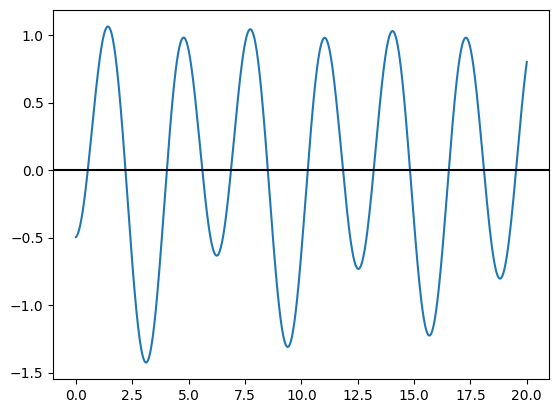

In [22]:
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(0,20,1000)
evalX = [CompleteX(0.1, 1, 2, 0.5, 0, 3, t ) for t in x]
plt.plot(x, evalX)
plt.axhline(color='black')
plt.show()

This is a plot of the early time behavior of the oscillator. At early times, the initial conditions are important. At later times, the initial conditions wash out and the oscillator locks to the driving force. If we look at the motion during lat times, we see that the amplitude no longer varies. The initial conditions no longer matter.

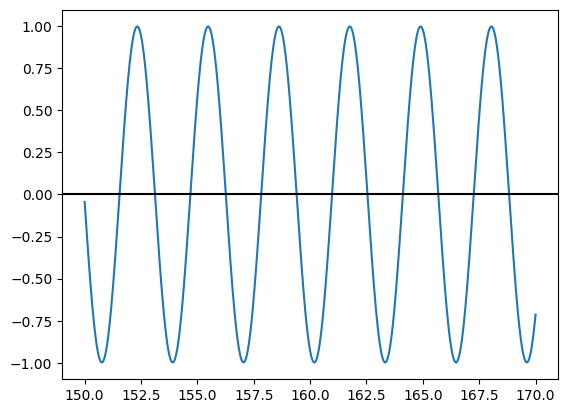

In [23]:
x2 = np.linspace(150,170,1000)
evalX2 = [CompleteX(0.1, 1, 2, 0.5, 0, 3, t ) for t in x2]
plt.plot(x2, evalX2)
plt.axhline(color='black')
plt.show()

What do we mean by late times? We mean times that are long enough so that the non-driven terms has effectively died off. Below is the non-driven term for our oscillator.

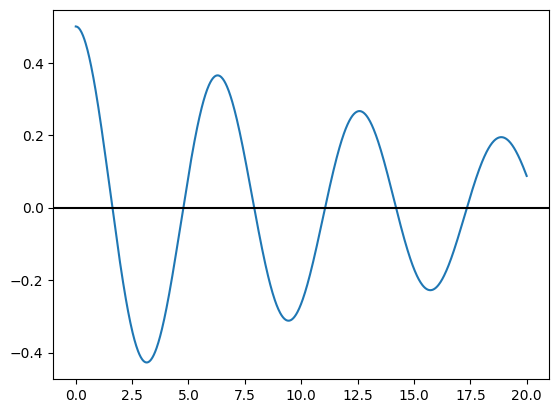

In [24]:
#def CompleteX(γ, ω, ωe, x0, v0, Fm, t):
nonDriven = x1(A,γ,ϕ,ω,t).subs({x0: 0.5, v0: 0, ωe: 2, ω: 1, γ: 0.1, Fm: 3})
x=np.linspace(0,20,1000)
evalNon = [nonDriven.subs(t, i) for i in x]
plt.plot(x, evalNon)
plt.axhline(color='black')
plt.show()

(Recall that this is a case where we have "underdamped" motion, or weak friction, which satisfies $\gamma < 4 \omega^2$)
<br><br>
After 20 seconds, the amplitude has decreased by roughly a factor of two, but the amplitude is not zero and the intitial conditions have not been entirely washed out. This can be seen from the plot below.

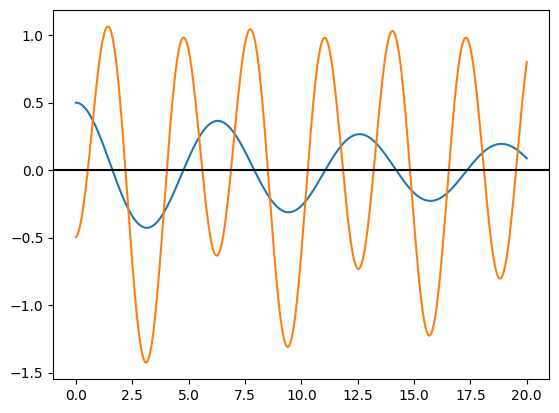

In [25]:
plt.plot(x, evalNon)
plt.plot(x, evalX)
plt.axhline(color='black')
plt.show()

After 50 seconds the initial conditions have almost been washed out and the amplitude of the non-driven term is almost zero as can be seen from the next three plots.

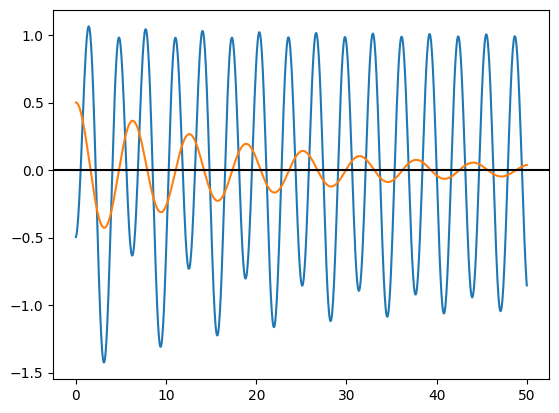

In [26]:
longX = np.linspace(0,50, 1000)
evalX3 = [CompleteX(0.1, 1, 2, 0.5, 0, 3, t ) for t in longX]
longNon = [nonDriven.subs(t, i) for i in longX]

plt.plot(longX, evalX3)
plt.plot(longX, longNon)
plt.axhline(color='black')
plt.show()

How long it takes the initial conditions to wash out depends on the starting conditions and on the damping factor. After enough time all oscillators that differ only in their starting conditions ($x0$ and $v0$) will look the same. Suppose we have a second oscillator with the same values of the parameters ($\gamma, \omega,$ and $\omega e$) but different values of $x0$ and $v0. Such an oscillator is plotted below.

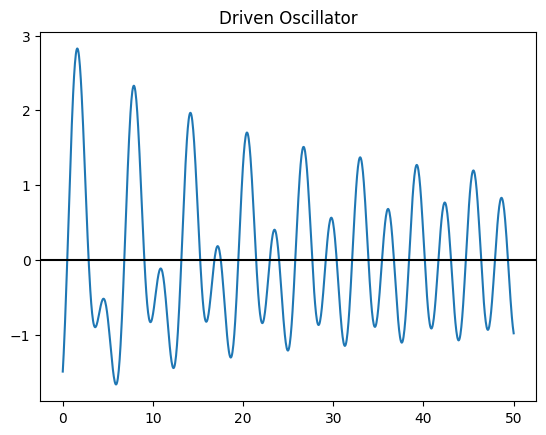

In [27]:

DrivenDiff = [CompleteX(0.1, 1, 2, -0.5, 2, 3, t ) for t in longX]

plt.plot(longX, DrivenDiff)
plt.axhline(color='black')
plt.title("Driven Oscillator")
plt.show()

At small times the motion of this oscillator is much different than the motion of our first oscillator. But after 50 seconds, their motion is almost the same.

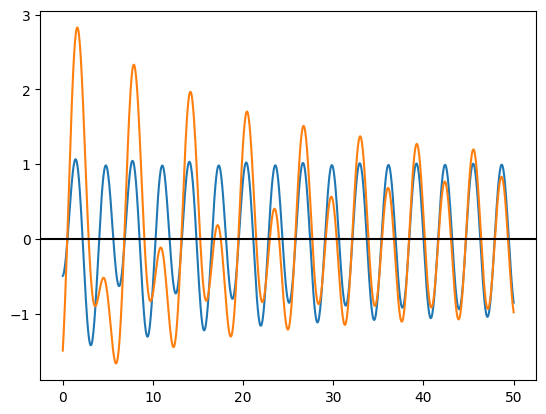

In [28]:
plt.plot(longX, evalX3)
plt.plot(longX, DrivenDiff)
plt.axhline(color='black')
plt.show()

<h2>Resonance</h2>
Let us go back and look at the constant $A_1$ more closely. Recall that our solution to the inhomogeneous equation was $x2(t) = A_1 \cos(\omega_e t + \phi_1)$ Because the non-driven part $x_1(t)$ goes to zero at large times, $A_1$ is the large-time amplitude of oscillation.
<br><br>
Recall that $A_1$ is given by

In [29]:
answer

F*m/(sqrt((γ**2*ωe**2 + ω**4 - 2*ω**2*ωe**2 + ωe**4)/(ω**4 - 2*ω**2*ωe**2 + ωe**4))*(ω**2 - ωe**2))

so $A_1$ increases as the denominator gets smaller. if $\gamma = 0$ then $A_1$ blows up when $\omega e = \omega$

In [30]:
answer.subs(γ, 0)

F*m/(ω**2 - ωe**2)

Shown below is the polot of the amplitude of the oscillator as we go from zero to five times the natural frequency, $\omega$. The plot is for an undamped oscillator ($\gamma = 0$):

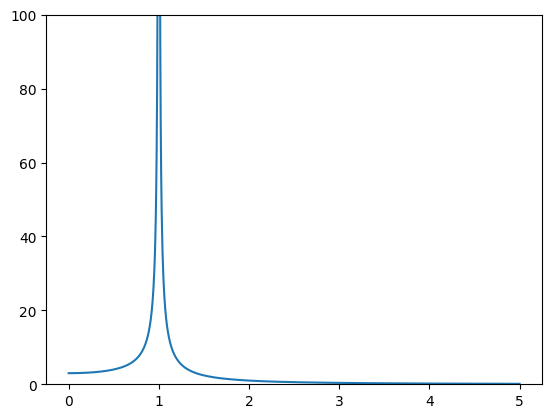

In [31]:
xRange = np.linspace(0,5,1000)
evalA1 = [np.abs(answer.subs({F*m: 3, ωe: c, γ: 0, ω: 1})) for c in xRange]
ax = plt.gca()
ax.set_ylim([0, 100])
plt.plot(xRange, evalA1)
plt.show()

The behavior is known as resonance. Driving an oscillator at or close to its natural frequency will cause the amplitude of the oscillators to increase dramatically. This is desirable in some cases and a disaster in others. Some say that this is what destroyed the Tacoma Narrows bridge (<a href="https://en.wikipedia.org/wiki/Tacoma_Narrows_Bridge_%281940%29#Cause_of_the_collapse">As we discussed though, this is disputed by some</a>). If we increase the damping, the peak becomes less sharp.

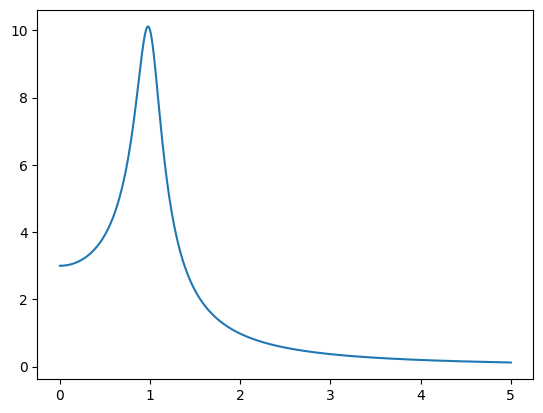

In [32]:
evalA1_2 = [np.abs(answer.subs({F*m: 3, ωe: c, γ: 0.3, ω: 1})) for c in xRange]
plt.plot(xRange, evalA1_2)
plt.show()

The animation below shows what happens as we increase the damping $\gamma = 0.1$ to $\gamma = 0.4$. Notice that the peak amplitude shrinks dramatically as the damping increases.

In [65]:
#used to generate frames of animation, assembled with ffmpeg

#for i in range(10,80):
#    n = i / 200
#    evalA1_3 = [np.abs(answer.subs({F*m: 3, ωe: c, γ: n, ω: 1})) for c in xRange]
#    plt.clf()
#    plt.ylim([0,30])
#    plt.plot(xRange, evalA1_3)
#    plt.savefig(f"./plt-%i.png" % i)

In [52]:
from IPython.display import Video

Video("anim.mp4")

<h2>The Response to more Complex Wave</h2>
Why do we care how an oscillator responds to a cosine wave? We care because it turns out that every periodic wave can be written as a sum of sines and cosines (in principle, an infinite sum). This is done using a branch of mathematics called Fourier analysis, and the (amazing and beautiful) theory behind it is beyond the scope of this course.
<br><br>
However, we can see how this works graphically. Suppose the driving force in our system is a "triangle wave" (it's exactly what it sounds like). It turns out (using Fourier analysis) that if we add up cosine waves of the form $\cos(i \omega t)$, where $i$ is an odd integer, and weight each term by an amplitdue of $\frac{1}{i^2}$, we can approximate a triangle wave with angular frequency $\omega e$! Let's define the function "triangleWave to make such a wave using $n$ terms:

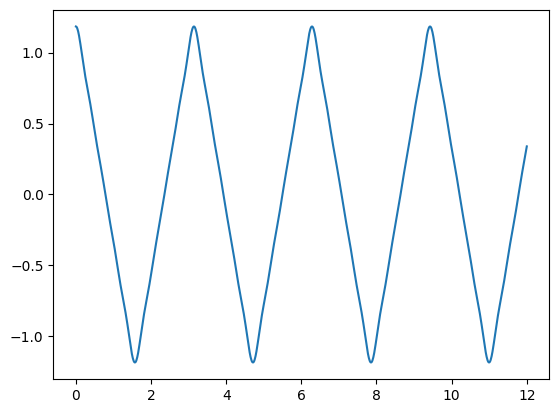

In [66]:
def TriangleWave(t, n, ωe):
    i=1
    term = 0
    j=0
    for i in range(1,n,2):
        term += (1/(i**2)) * np.cos(i*ωe*t)
    return term

tri_x = np.linspace(0,12,1000)
tri_eval = [TriangleWave(i, 10, 2) for i in tri_x]

plt.plot(tri_x, tri_eval)
plt.show()

After only 10 terms, we get a good approximation for an actual triangle wave.
<br><br>
Here is how the approximation improves using an increasing number of terms:

In [71]:
Video("anim2.mp4")

In [72]:
#animation of n increasing
#for n in range(0,50):
#    tri_eval_2 = [TriangleWave(i, n, 2) for i in tri_x]
#    plt.clf()
#    plt.plot(tri_x, tri_eval_2)
#    plt.savefig(f"plt2-%i.png" % n)


Since each term in our triangle wave is just a cosine term, we already know how the oscillator will respong to each of them separately. To get the reponse to the whole wave, we slove the equation for each term and add each of them together.

In [73]:
def CompleteXTriangle(γ, ω, ωe, x0, v0, Fm, n, t):
    a = sym.E**((-t * γ)/2) * x0 * sym.sqrt(1 + ((-2*v0 - x0 * γ)**2)/(x0**2*(-γ**2+4*ω**2)))
    b = sym.cos((1/2)*t*sym.sqrt(-γ**2 + 4 * ω**2) + sym.atan((-2*v0-x0*γ)/(x0*sym.sqrt(-γ**2 + 4*ω**2))))
    c = [((1/i**2) * sym.cos(t*(2*i) + sym.atan((γ*(2*i))/(-ω**2 + (2*i)**2))))/((ω- 2*i)*(ω+2*i)*sym.sqrt((ω**4 + (γ**2-2*ω**2)*(2*i)**2 + (2*i)**4)/(ω**2 - (2*i)**2)**2)) for i in range(1,n,2)]
    return a*b + sum(c)

CompleteXTriangle(0.1, 1, 0, -0.5, 2, 0, 10, t)

-0.33259505261887*cos(2*t + 0.0665681637758238) - 0.0031741368050891*cos(6*t + 0.0171411781386087) - 0.000404019793414531*cos(10*t + 0.0101006665853219) - 0.000104654550337856*cos(14*t + 0.00717936382765997) - 3.82213229583834e-5*cos(18*t + 0.00557269773060503) - 2.03970610689537*exp(-0.05*t)*cos(0.998749217771909*t + 1.32313908546617)

(Before moving on, think about the homogeneous and inhomogeneous parts of the original equation... There is some subtletly here.)
<br>
The short time or transient behavior of the system is quite complex.

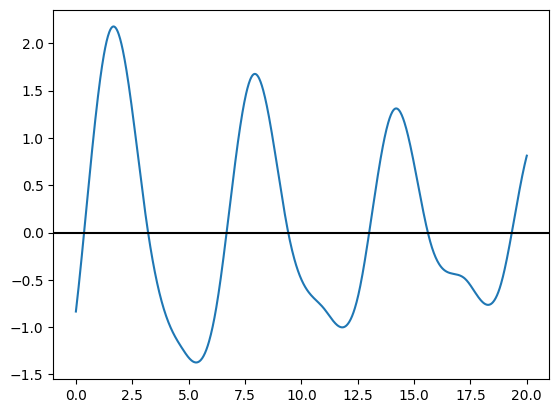

In [74]:
complexX = np.linspace(0,20,1000)
complexEval = [CompleteXTriangle(0.1, 1, 0, -0.5, 2, 0, 10, t) for t in complexX]
plt.plot(complexX, complexEval)
plt.axhline(color='black')
plt.show()

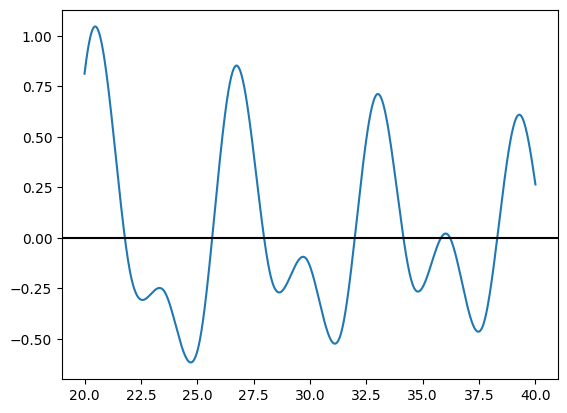

In [75]:
complexX2 = np.linspace(20,40,1000)
complexEval2 = [CompleteXTriangle(0.1, 1, 0, -0.5, 2, 0, 10, t) for t in complexX2]
plt.plot(complexX2, complexEval2)
plt.axhline(color='black')
plt.show()

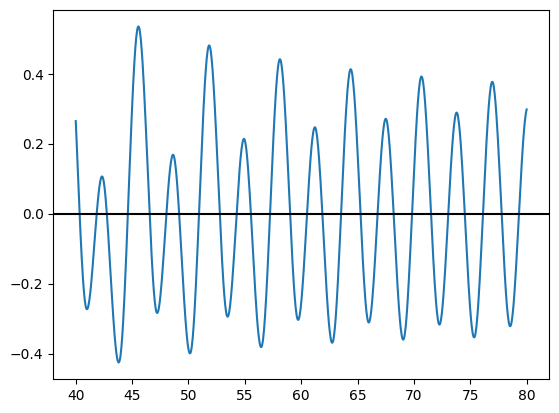

In [76]:
complexX3 = np.linspace(40,80,1000)
complexEval3 = [CompleteXTriangle(0.1, 1, 0, -0.5, 2, 0, 10, t) for t in complexX3]
plt.plot(complexX3, complexEval3)
plt.axhline(color='black')
plt.show()

The long term or steady state behavoir is much simpler but can change widely depending on the parameters of the system. The only difference between the two plots below is that in the first $\omega = 1$ and in the second $\omega = 7$.

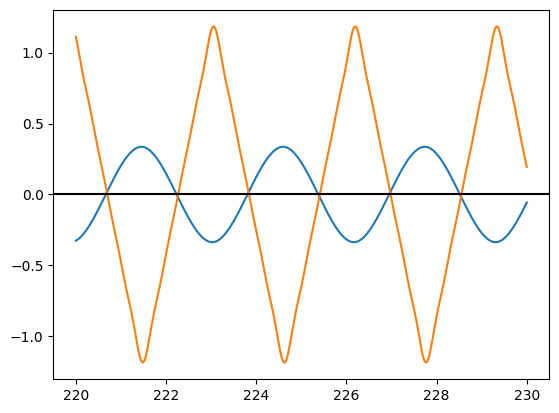

In [77]:
long_state = np.linspace(220,230,1000)
comp_tri_eval_small = [CompleteXTriangle(0.1, 1, 0, -0.5, 2, 0, 10, t) for t in long_state]
tri_eval_long = [TriangleWave(i, 10, 2) for i in long_state]
plt.plot(long_state, comp_tri_eval_small)
plt.plot(long_state, tri_eval_long)
plt.axhline(color='black')
plt.show()

In [ ]:
long_state2 = np.linspace(220,230,1000)
comp_tri_eval_small2 = [CompleteXTriangle(0.1, 7, 0, -0.5, 2, 0, 10, t) for t in long_state]
tri_eval_long2 = [TriangleWave(i, 10, 2) for i in long_state2]
plt.plot(long_state2, comp_tri_eval_small2)
plt.plot(long_state2, tri_eval_long2)
plt.axhline(color='black')
plt.show()

<h2>Exercises</h2>
The assignment for Week 14 is to complete the following problems. <u>The submissions should include your input code, the relevant outputs, and some sentences which explain the results.</u> The code should be self-contained and should run "in order"; that is, I should be able to simply run your notebook from beginning to end in order to reproduce your outputs.
<h3>Problem One</h3>
We observed (in the "Resonance" section) that a driving force $F_m \cos(\omega_e t + \phi_1)$ produces a <i>very</i> large amplitude in the position oscillator $x(t)$ if the latter has a natural frequency $\omega$ which is very close to $\omega_e$. This effect was amplified for a small damping factor $\gamma$ if ($\gamma = 0$, the amplitude $A \rightarrow \infty$ as $\omega = \omega_e$!)

Consider instead a triangle wave as the driving force.  What happens to the oscillator if the triangle wave has a frequency that is almost the same as the natural frequency of the system?  Hint: A plot (or several) would be a good idea here.

<h3>Problem Two</h3>
We claimed that a triangle wave could be approximated (in a Fourier series) as

In [ ]:
def TriangleWave(t, n, ωe):
    i=1
    term = 0
    j=0
    for i in range(1,n,2):
        term += (1/(i**2)) * np.cos(i*ωe*t)
    return term

The power of Fourier analysis lies in the fact (not proven here) that <i>any</i> periodic function $F(t)$ can be approximated by a sum of cosine terms.
<br>
For example, a square wave can be approximated by the following function (we have chosen a frequency $f = 2$ and an "amplitude" $F_ = 1$ for this example):

In [ ]:
def SquareWave(t, n):
    term = 0
    for i in range(1,n):
        term += (2/np.pi) * (-1**i)/i * np.sin((i*np.pi)/2) * np.cos(i*np.pi*t)
    return term

squareX = np.linspace(0,10,1000)
squareEval = [SquareWave(t, 10) for t in squareX]

plt.plot(squareX,squareEval)
plt.show()

Make an animation showing the square wave being built up out of the individual terms. What happens if you take more than ten terms?
<br>
<br>
Since the only time-dependence in the square wave is in the cosine term, we can solve for the position of an oscillator with a square wave input just as we did for a triangle wave input. Do so.
<u>Hint:</u> Unlike the triangle wave the square wave has a constant term. However, a constant term is just another inhomogeneous term (with $\omega_e \rightarrow 0$, if you like) since $\cos(0)=1$. Therefore, your solution should have three parts: the homogeneous term ("$x_1$"), a sum of cosine terms ("$x_2$s), and a zero frequency term (let's call it "$x_3$").
<br><br>
Look at both the short and long time behavior of the oscillator and look at what happends when the driving frequency is close to the natural frequency.